# Setup

In [ ]:
!pip install opendatasets
!pip install google
!pip install clean-text
!pip install gibberish-detector
!pip install googletrans==3.1.0a0
!pip install torch==1.11.0
!pip install torchtext

import pandas as pd
import opendatasets as od
import numpy as np
from IPython.display import display
import seaborn as sns
from google.colab import files
from os import path
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from textblob import TextBlob
import re
from cleantext import clean
from traitlets.config import defaultdict
from gibberish_detector import detector
from googletrans import Translator
import torch
import torchtext

nltk.download('stopwords')
nltk.download('wordnet')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 175.4/175.4 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 53.1/53.1 kB 3.3 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171048 sha256=db37d20d66ed28b6f790eb51cb8afebca5e3bec3e3c8f3b7cee9a0f391e385aa
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
print(torchtext.__version__)

0.15.1+cpu


In [ ]:
if not path.exists('./twitter_MBTI.csv'):
  files.upload()  # Upload your kaggle.json here

  !pip install -q kaggle
  !mkdir -p ~/.kaggle
  !cp kaggle.json ~/.kaggle/
  !chmod 600 /root/.kaggle/kaggle.json

  !kaggle datasets download -d mazlumi/mbti-personality-type-twitter-dataset
  !unzip -q mbti-personality-type-twitter-dataset.zip
  !rm mbti-personality-type-twitter-dataset.zip

data = pd.read_csv('./twitter_MBTI.csv') 

Saving kaggle.json to kaggle.json
 77% 25.0M/32.7M [00:00<00:00, 121MB/s] 
100% 32.7M/32.7M [00:00<00:00, 123MB/s]


# Exploratory Data Analysis

In [ ]:
data.describe()

Unnamed: 0
count  7811.000000
mean   3905.000000
std    2254.985809
min       0.000000
25%    1952.500000
50%    3905.000000
75%    5857.500000
max    7810.000000

In [ ]:
# Display the variables and data types in a table format
display(data.dtypes.to_frame().rename(columns={0: "Data Type"})) 

# Display dataset information
display(data.info())

# Display count of missing values in each variable
display(data.isnull().sum().to_frame().rename(columns={0: "Count of Missing Values"}))

# ---------------------
# The data contains 7811 rows and 3 columns. The labels for each column are the row value for each data (0-7810), text (tweet), and the personality label for the tweeter. There are no missing values in the data. 

Data Type
Unnamed: 0     int64
text          object
label         object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7811 entries, 0 to 7810
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7811 non-null   int64 
 1   text        7811 non-null   object
 2   label       7811 non-null   object
dtypes: int64(1), object(2)
memory usage: 183.2+ KB


None

Count of Missing Values
Unnamed: 0                        0
text                              0
label                             0

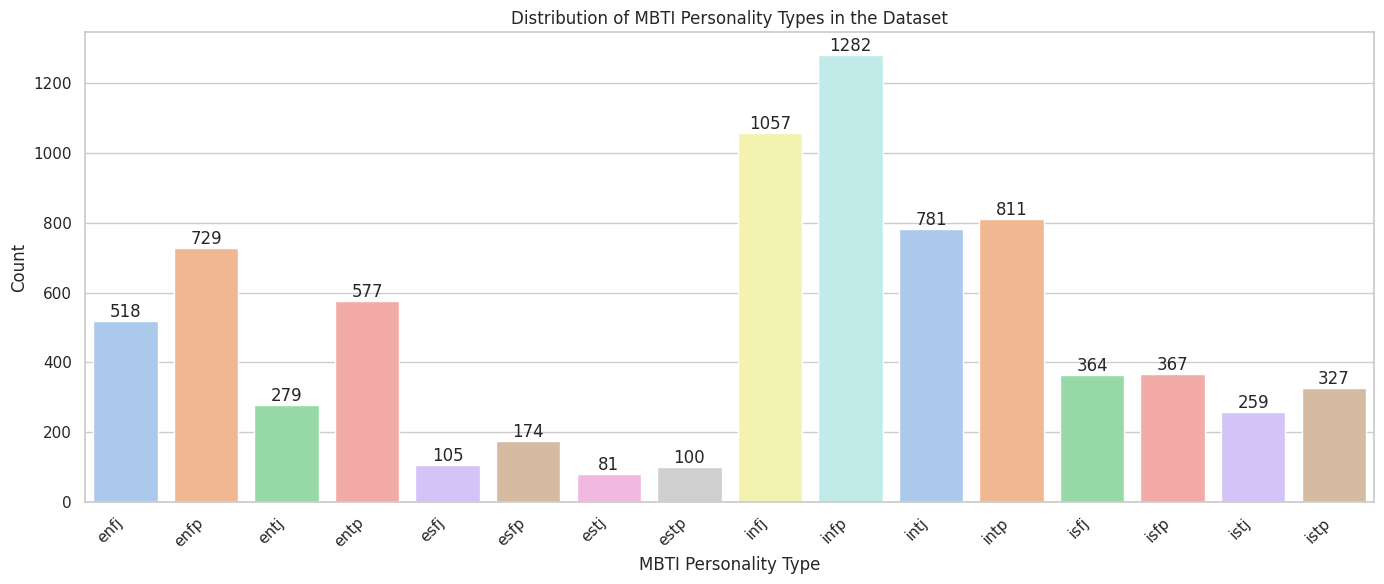

In [ ]:
# Set the style and color palette
sns.set(style="whitegrid", palette="pastel")

# Create count plot with interactive features
plt.figure(figsize=(14, 6))
ax = sns.countplot(data=data, x='label', order=sorted(data['label'].unique()), 
                   palette="pastel")
ax.set_title('Distribution of MBTI Personality Types in the Dataset')
ax.set_xlabel('MBTI Personality Type')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=12)
plt.tight_layout()

# Show interactive plot
plt.show()

# ---------------------
# Each row has a corresponding MBTI label for the tweeter 

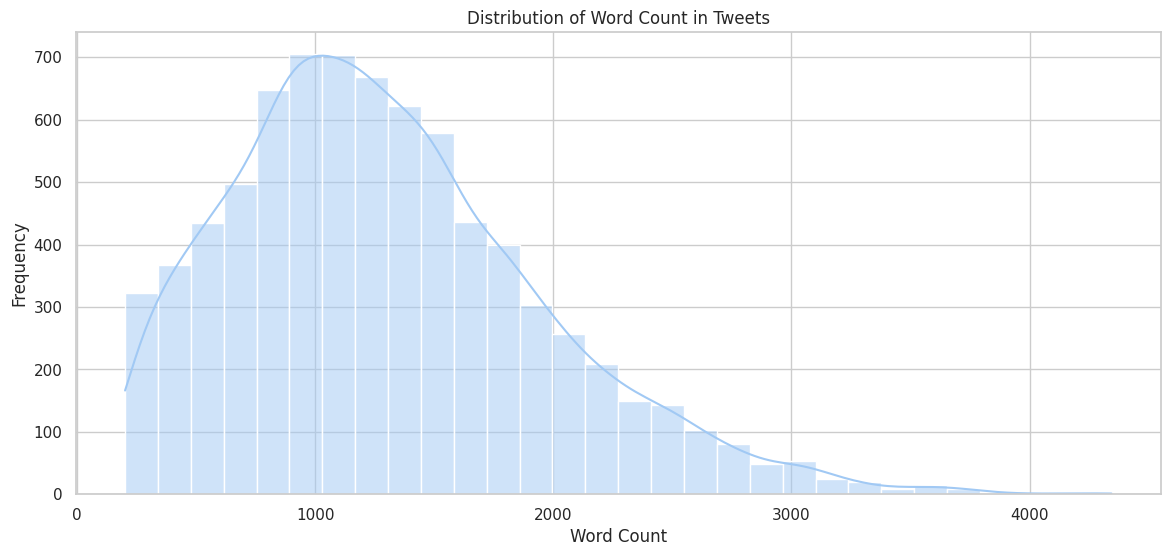

In [ ]:
# Plot distribution of word counts for each tweet
plt.figure(figsize=(14, 6))
sns.histplot(data=data['text'].apply(lambda x: len(x.split())), bins=30, kde=True)
plt.title('Distribution of Word Count in Tweets')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

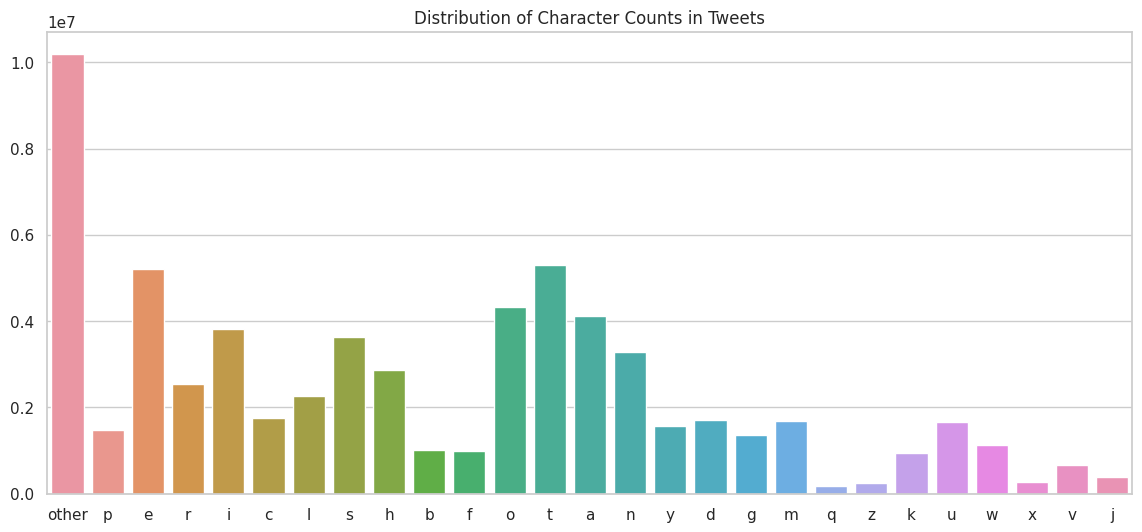

In [ ]:
chars = defaultdict(int)

def count_chars(tweet):
  for word in tweet.split():
    for char in word:
      char = char.lower()
      if char.isalpha() and char.isascii():
        chars[char]+=1
      else:
        chars['other']+=1

data.get("text").apply(count_chars)

plt.figure(figsize=(14, 6))
plt.title('Distribution of Character Counts in Tweets')
sns.barplot(x=list(chars.keys()), y=list(chars.values()))
plt.show()

# Other category includes everything that is not a letter in the English alphabet such as emojis, letters from foreign languages, and punctuation.

In [ ]:
# Detect Gibberish
if not path.exists('big.model'):
    files.upload()
Detector = detector.create_from_model('big.model')
def detect_gibberish_tweet(tweet):
  return Detector.calculate_probability_of_being_gibberish(tweet)

KeyboardInterrupt: ignored

In [ ]:
data_with_gibberish_label = data.assign(text_gibberish_probability=data.get("text").apply(detect_gibberish_tweet))
data_with_gibberish_label

Unnamed: 0                                               text label  \
0              0  @Pericles216 @HierBeforeTheAC @Sachinettiyil T...  intj   
1              1  @Hispanthicckk Being you makes you look cute||...  intj   
2              2  @Alshymi Les balles sont r√©elles et sont tir√©e...  intj   
3              3  I'm like entp but idiotic|||Hey boy, do you wa...  intj   
4              4  @kaeshurr1 Give it to @ZargarShanif ... He has...  intj   
...          ...                                                ...   ...   
7806        7806  @sobsjjun God,,pls take care üòï|||@sobsjjun Hir...  intp   
7807        7807  @Ignis_02 wow last time i got intp https://t.c...  intp   
7808        7808  @akupilled A 100%|||@akupilled That SOMEONE wi...  entp   
7809        7809  If you‚Äôre #INTJ this one is for you | What is ...  infj   
7810        7810  @harry__lambert @gucci hey can you dm me a pic...  istp   

      text_gibberish_probability  
0                       3.101766  
1                       3.091543  
2                       3.306833  
3                       2.957641  
4                       3.322980  
...                          ...  
7806                    3.513421  
7807                    3.324015  
7808                    3.061010  
7809                    3.505624  
7810                    3.230032  

[7811 rows x 4 columns]

In [ ]:
data_with_gibberish_label['text_gibberish_probability'].describe()

count    7811.000000
mean        3.277653
std         0.231429
min         2.681905
25%         3.110638
50%         3.238682
75%         3.409489
max         4.508320
Name: text_gibberish_probability, dtype: float64

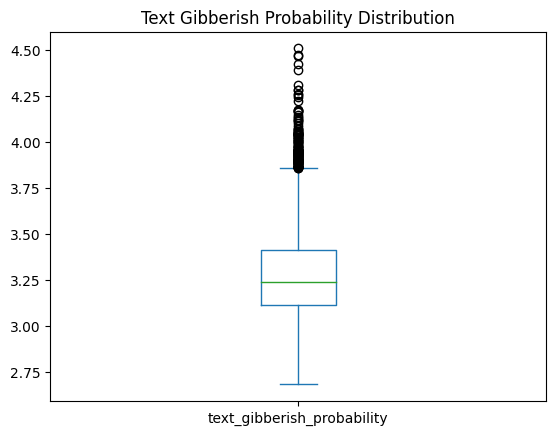

In [ ]:
data_with_gibberish_label['text_gibberish_probability'].plot(kind='box', title='Text Gibberish Probability Distribution')
plt.show()

In [ ]:
# detect language
def detect_translate_lang(text):
  translator = Translator()
  lang = translator.detect(text[:500]).lang
  return lang

In [ ]:
#translating tweets
data_with_lang = data.assign(lang=data.get("text").apply(detect_translate_lang))
data_with_lang.head()

KeyboardInterrupt: ignored

In [ ]:
#changes lists in the lang column to strings
def convert_to_string(text):
  if isinstance(text, list):
    text = ' '.join(text)
  return text

data_with_lang = data_with_lang.assign(lang=data_with_lang.get("lang").apply(convert_to_string))
data_with_lang.head()

Unnamed: 0                                               text label lang
0           0  @Pericles216 @HierBeforeTheAC @Sachinettiyil T...  intj   en
1           1  @Hispanthicckk Being you makes you look cute||...  intj   en
2           2  @Alshymi Les balles sont r√©elles et sont tir√©e...  intj   fr
3           3  I'm like entp but idiotic|||Hey boy, do you wa...  intj   en
4           4  @kaeshurr1 Give it to @ZargarShanif ... He has...  intj  kri

In [ ]:
#number of tweets per language
grouped_lang = data_with_lang.groupby('lang').count()
grouped_lang.sort_values('text', ascending=False).head()

Unnamed: 0  text  label
lang                          
en           7265  7265   7265
tl            174   174    174
id             51    51     51
ko             43    43     43
zh-CN          23    23     23

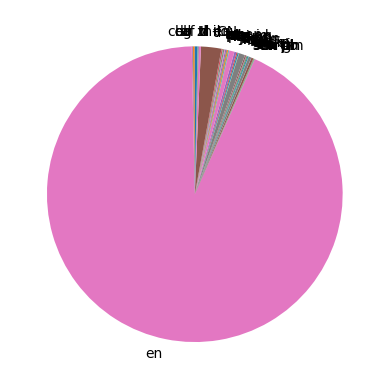

In [ ]:
#distribution of languages
y = grouped_lang.get('text').values
mylabels = grouped_lang.index

plt.pie(y, labels = mylabels, startangle = 90)
plt.show() 

# Data Cleaning


In [ ]:
# Helpful Links
# https://aronakhmad.medium.com/twitter-data-cleaning-using-python-db1ec2f28f08
# https://catriscode.com/2021/05/01/tweets-cleaning-with-python/
data = pd.read_csv('/content/twitter_MBTI.csv')

print('before cleaning:')
raw_data = repr(data.at[7806,'text'][:200]) # repr covert text to raw text which shows char like '\n'
print(raw_data)

for i in range(len(data['text'])):
  # remove @, #, web URL, newLine characters, special characters
  cleaned_text = re.sub(r'(@[A-Za-z0-9_]+)|(#[A-Za-z0-9_]+)|(http\S+)|(www.\S+)|(\n)|([^\w\s])','', data['text'][i])
  # replace multiple white spaces to single white space, then convert text to lowercase
  cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip().lower()
  data.at[i, 'text'] = cleaned_text

# removing emoji using cleantext.clean lib
data['text'] = data['text'].apply(lambda text: clean(text, no_emoji=True)) # Inefficient

print('after cleaning:')
raw_data = repr(data.at[7806,'text'][:200])
print(raw_data)
#display(data.loc[0]['text']) # After
data

before cleaning:
'@sobsjjun God,,pls take care üòï|||@sobsjjun Hiro emergency room???? Are you okay wait|||@_dafahoe_ Zeharrrrrrrüò≠üò≠üò≠üò≠üò≠üò≠üò≠üò≠|||@txtlomlsss @YE0NYANG OH MY GOD thats üíî|||@YE0NYANG @txtlomlsss DID I LIE|||@soo'
after cleaning:
'godpls take care hiro emergency room are you okay wait zeharrrrrrr oh my god thats did i lie i knownano hsoule grandma r so cutemy whole tl just 4 oomfs doing sum shit but i love it is this u plus i t'


Unnamed: 0                                               text label
0              0  the pope is infallible this is a catholic dogm...  intj
1              1  being you makes you look cute on because then ...  intj
2              2  les balles sont reelles et sont tirees tres ra...  intj
3              3  im like entp but idiotichey boy do you want to...  intj
4              4  give it to he has pica since childhood say qub...  intj
...          ...                                                ...   ...
7806        7806  godpls take care hiro emergency room are you o...  intp
7807        7807  wow last time i got intp i think u upset the f...  intp
7808        7808  a 100 that someone will get his ass kicked so ...  entp
7809        7809  if youre this one is for you what is never fun...  infj
7810        7810  hey can you dm me a pic of what harry is weari...  istp

[7811 rows x 3 columns]

In [ ]:
data = data[data['text'].apply(detect_translate_lang)=='en'] # Strip the text of all foreign language. !Takes forever!
data.head()

In [ ]:
data.head()

NameError: ignored

# Preprocessing

### Tokenization

In [ ]:
nltk.download('punkt')
data['text_tokenized'] = data['text'].apply(lambda x: word_tokenize(x))

In [ ]:
data.head()

### Stopword removal


In [ ]:
stop_words = set(stopwords.words('english'))

# Iterate over each row and remove stop words from tokenized text
for index, row in data.iterrows():
    text_tokens = row['text_tokenized']
    filtered_tokens = list(filter(lambda token: token not in stop_words, text_tokens))
    data.at[index, 'text_tokenized'] = filtered_tokens

In [ ]:
data.head()

### Lemmatization

In [ ]:
# Initialize the Lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_text(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

data['text_tokenized_lemmatized'] = data['text_tokenized'].apply(lemmatize_text)

In [ ]:
data.head()

## Preprocess with (Sentiment Analysis with Pytorch by Gal Hever)

In [ ]:
# char_based = True
# if char_based:
#     tokenizer = lambda s: list(s) # char-based
# else:
#     tokenizer = lambda s: s.split() # word-based
#     Text = data.Field(preprocessing=cleanup_text, tokenize=tokenizer, batch_first=True,\
#                       include_lengths=True, fix_length=max_document_length)Label = data.Field(sequential=False,\
#                       use_vocab=False, pad_token=None, unk_token=None)

### Data Cleaning 

In [ ]:
def cleanup_text(texts):
    cleaned_text = []
    # removing emoji using cleantext.clean lib. 
    #Note: I think it also cleaned extra white spaces and upperCase. Need double check
    text = clean(text, no_emoji=True) # Inefficient
    # remove @, #, web URL, newLine characters, special characters
    text = re.sub(r'(@[A-Za-z0-9_]+)|(#[A-Za-z0-9_]+)|\
    (http\S+)|(www.\S+)|(\n)|([^\w\s])','', texts)

    cleaned_text.append(text)
    return cleaned_text

In [ ]:
from torchtext.legacy import data
Text = torchtext.legacy.data.Field(preprocessing=cleanup_text, tokenize=tokenizer, batch_first=True,\
                       include_lengths=True, fix_length=max_document_length)
Label = torchtext.legacy.data.Field(sequential=False, use_vocab=False, pad_token=None, unk_token=None)

ModuleNotFoundError: ignored

In [ ]:

print(torchtext.__version__)

0.15.1+cpu


# Preprocessing with custom dataset (Ignore the below, failing approach)


In [ ]:
# np.loadtxt('/content/twitter_MBTI.csv', delimiter=',', dtype=str)
pd.read_csv('/content/twitter_MBTI.csv').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7811 entries, 0 to 7810
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7811 non-null   int64 
 1   text        7811 non-null   object
 2   label       7811 non-null   object
dtypes: int64(1), object(2)
memory usage: 183.2+ KB


In [ ]:
dt = np.dtype([('Unnamed: 0', "str"), ("text", str), ('label', str)])
#np.loadtxt('/content/twitter_MBTI.csv', delimiter=',', dtype=str)
# df = pd.read_csv('/content/twitter_MBTI.csv', dtype={'Unnamed: 0': str, 'text': str, 'label': str})
# with open('/content/twitter_MBTI.csv', 'r') as f:
#     for i in range(15):
#         line = f.readline()
#         print('line', i, line)
print(torchtext.__version__)

0.15.1+cpu


In [ ]:
import torchvision
from torch.utils.data import Dataset, DataLoader

In [ ]:
class MBTIDataset(Dataset):

  def __init__(self):
    df = pd.read_csv('/content/twitter_MBTI.csv', dtype=str)
    self.x = torch.from_numpy(df['text'].values.astype(str))
    self.y = torch.from_numpy(df['label'].values.astype(str))
    self.n_samples = len(df)
  def __getitem__(self, index):
    return self.x[index], self.y[index]
  def __len__(self):
    return self.n_samples

dataset = MBTIDataset()
dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=2)

num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)
print(total_samples, n_iterations)

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        # here: 178 samples, batch_size = 4, n_iters=178/4=44.5 -> 45 iterations
        if (i+1) % 5 == 0:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_iterations}, inputs {inputs.shape}')


TypeError: ignored

In [ ]:
from torchdata.datapipes.iter import IterableWrapper, FileOpener
from torchtext.data.utils import get_tokenizer

tokenizer = get_tokenizer("basic_english")

datapipe = IterableWrapper(['/content/twitter_MBTI.csv'])
datapipe = FileOpener(datapipe, mode='b')
datapipe = datapipe.parse_csv(skip_lines=1)

for sample in datapipe:
     print(sample)
     break

['0', '@Pericles216 @HierBeforeTheAC @Sachinettiyil The Pope is infallible, this is a catholic dogma \n\nIt doesn‚Äôt mean the‚Ä¶ https://t.co/qmt0ezk0Ey|||@HierBeforeTheAC @Pericles216 @Sachinettiyil And by perpetually it entails that the church herself can elect new po‚Ä¶ https://t.co/OGTxKfUDHQ|||@HierBeforeTheAC @Pericles216 @Sachinettiyil You open the door to unironic nonsense when you believe this nonsense.‚Ä¶ https://t.co/Y6OqVfVwuY|||@HierBeforeTheAC @Pericles216 @Sachinettiyil You don‚Äôt know your own faith lol you just tried to say that ‚Äúperpetua‚Ä¶ https://t.co/AUzB61Ap4H|||@HierBeforeTheAC @Pericles216 @Sachinettiyil That‚Äôs like me saying that I‚Äôm gonna give you a bike that will never b‚Ä¶ https://t.co/KF7PpQwxaD|||@HierBeforeTheAC @Pericles216 @Sachinettiyil You have a dumb view of God‚Äôs preservation of the church. God doesn‚Äôt‚Ä¶ https://t.co/16aNiNAwDa|||@HierBeforeTheAC @Pericles216 @Sachinettiyil It‚Äôs not heretical, all sedes do is take 2 quotes out of cont

In [ ]:
from torchtext.data.utils import get_tokenizer

tokenizer = get_tokenizer("basic_english")
tokenizer('hey1234@@wtf  ! f  man')

['hey1234@@wtf', '!', 'f', 'man']